# Abstract

Bla

<div id="toc"></div>

# Einleitung

Blla

# Neuronale Netzwerke

## Grundlagen

Ein neuronales Netzwerk kann in vielerlei Hinsichten mit einem Gehirn verglichen werden. Ähnlich wie das Gehirn besteht ein neuronales Netzwerk aus vielen Neuronen. Es gibt verschiedene Arten von Neuronen, die sich unter anderem durch ihre Aktivierungsfunktionen unterscheiden. Auf Aktivierungsfunktionen wird in einem späteren Teil der Arbeit genauer eingegangen.
Grundsätzlich besitzt jedes Neuron Eingabewerte $x_j$ die mit Gewichten (Weights) $w_j$ verbunden sind. Noch dazu besitzt jedes Neuron ein Bias-Wert (Bias) $b$. All diese Faktoren haben Einfluss auf den Ausgabewert $z$ eines Neurons. Um diesen zu berechnen, wird die gewichtete Summe der Eingabewerte mit dem Bias-Wert addiert. (vgl. Nielsen, 2015, #Perceptrons) Mathematisch kann diese Berechnung folgendermaßen dargestellt werden:

$$z = \sum_{j=1}^n {w_j x_j + b}$$

Dabei steht $n$ für die Anzahl an Eingabewerten und Gewichten.

Mit einem einzelnen Neuron kann nicht viel angefangen werden, deswegen verbindet man die Neuronen miteinander, wodurch ein neuronales Netzwerk entsteht. Es gibt viele verschiedene Arten von neuronalen Netzwerken, das einfachste davon ist das sogenannte "Feedforward Neural Network".
Bei dieser Variante werden Informationen kontinuierlich, d.h. ausschließlich von einer Schicht zur nächsthöheren, weitergeleitet. Es kann in drei Teile unterteilt werden: die Eingabeschicht, die verborgenen Schichten und die Ausgabeschicht. (ebd.)


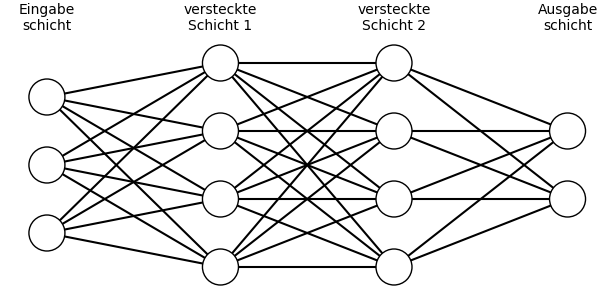

In [5]:
# Zeichne Netzwerk mit Code

from IPython.display import display, HTML
from io import BytesIO
import matplotlib.pyplot as plt
from src.erstelle_netzwerk import zeichne_netzwerk
from src.hilfsfunktionen import erstelle_bild

grosse = 6
y_ratio = 0.5
zeichne_netzwerk(grosse, y_ratio, [3, 4, 4, 2])

bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()


html = erstelle_bild(bild, 500, "Neuronales Netzwerk")
display(HTML(html))

### Die Eingabeschicht (Input Layer)

Die Eingabeschicht empfängt die Daten von externen Quellen. Bei einem Zahlenerkennungsmodell beispielsweise würde die Eingabeschicht die Pixeldaten des Bildes repräsentieren. Dementsprechend würde ein 28x28-Bild 784 Eingabeneuronen benötigen. (vgl. Lheureux, o.J.)

### Die verborgenen Schichten (Hidden Layers)

Die verborgenen Schichten sind das, was neuronale Netzwerke so besonders macht. Sie verbinden die Eingabeschicht und die Ausgabeschicht miteinander. Je nach Schwierigkeitsgrad der Anwendung werden mehr und längere verborgene Schichten benötigt. Je mehr verborgene Neuronen es gibt, desto kompliziertere Berechnungen kann das neuronale Netzwerk durchführen. (ebd.)

### Ausgabeschicht (Output Layer)

Die Ausgabeschicht gibt die endgültigen Vorhersagen des neuronalen Netzwerkes zurück. In dem Zahlenerkennungsmodell wären das die Ziffern null bis neun, wobei jede Ausgabe die Wahrscheinlichkeit für eine der Ziffern darstellt. (ebd.)

## Forward Propagation

### Matrixmultiplikation

Bei der Forward Propagation werden die Eingabewerte des neuronalen Netzwerkes zur nächsten Schicht weitergegeben, bis sie zur Ausgabeschicht kommen und Vorhersagen (Predictions) erzeugen. (vgl. Anshumanm2fja, 2024)

Um das neuronale Netzwerk in der Programmierung umzusetzen, verwende ich die Programmiersprache Python in Kombination mit dem Paket "NumPy". Ein neuronales Netzwerk mit zwei Eingabeneuronen und einem Ausgabeneuron kann wie folgt dargestellt werden:

In [55]:
import numpy as np # Import des Pakets NumPy

inputs = np.array([0.3, 0.6]) # Die Eingabewerte der Eingabeneuronen

# Die Gewichte zwischen den zwei Eingabeneuronen und dem Ausgabeneuron
weights = np.array([0.8, 0.2])
bias = 4 # Der Bias-Wert des Ausgabeneurons

# Berechnung des Ausgabewerts des Ausgabeneurons
output = inputs[0] * weights[0] + inputs[1] * weights[1] + bias
print(output)

4.36


In diesem Beispiel sind "inputs" die Eingabewerte der Eingabeneuronen und "weights" die Gewichtswerte zwischen den Eingabeneuronen und dem Ausgabeneuron. Der Bias-Wert des Ausgabeneurons wird als "bias" definiert.

Mathematisch kann die Liste an Eingabewerten als Zeilenvektor dargestellt werden:

$$
\def\xvector{\begin{bmatrix}
    x_1 & x_2 & \cdots & x_n
\end{bmatrix}}
\\
\mathbf{x} = \xvector$$

Hierbei stellt $n$ die Anzahl der Eingabewerte dar und somit hat der Vektor die Dimension $(1 \times n)$.

Im Folgenden werden auch noch die Ausgaben eines neuronalen Netzwerkes mit zwei Eingabeneuronen und zwei Ausgabeneuronen programmatisch berechnet:

In [15]:
inputs = np.array([1.2, 3.2])

# Gewichte zwischen Eingabeneuronen und Ausgabeneuronen
weights1 = np.array([0.8, 1.3])  # Gewichte für das erste Ausgabeneuron
weights2 = np.array([3.1, 1.6])  # Gewichte für das zweite Ausgabeneuron

bias1 = 4  # Bias-Wert für das erste Ausgabeneuron
bias2 = 3  # Bias-Wert für das zweite Ausgabeneuron

# Der Ausgabewert des ersten Ausgabeneurons
output1 = inputs[0] * weights1[0] + inputs[1] * weights1[1] + bias1

# Der Ausgabewert des zweiten Ausgabeneurons
output2 = inputs[0] * weights2[0] + inputs[1] * weights2[1] + bias2

print(output1, output2)

9.120000000000001 11.84


Jedoch ist diese Schreibweise sehr mühsam und ineffizient, weshalb ich zur Berechnung der Ausgaben Vektoren und Matrizen zusammen in Kombination mit der Matrixmultiplikation verwende. Dazu stelle ich die Gewichte als Matrix dar:

$$
\def\Wmatrix{\begin{bmatrix}
    w_{1,1} & w_{1,2} & \cdots & w_{1,k} \\
    w_{2,1} & w_{2,2} & \cdots & w_{2,k} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    w_{n,1} & w_{n,2} & \cdots & w_{n,k}
\end{bmatrix}}
\\
\mathbf{W} = \Wmatrix$$

Die Gewichtsmatrix $\mathbf{W}$ hat $n$ Zeilen, die der Anzahl der Eingabeneuronen entsprechen, und $k$ Spalten, die der Anzahl der Ausgabeneuronen entsprechen. Somit hat die Gewichtsmatrix die Form $(n \times k)$. Das Gewicht $w_{1,2}$ beschreibt die Verbindung zwischen dem ersten Eingabeneuron und dem zweiten Ausgabeneuron.

Um die Ausgabewerte des neuronalen Netzwerks zu berechnen, verwende ich die Matrixmultiplikation. Damit die Berechnung übersichtlicher wird, vereinfache ich den Eingabevektor $\mathbf{x}$ und die Gewichtsmatrix $\mathbf{W}$:

$$
\def\xvector{\begin{bmatrix}
    x_1 & x_2 & x_3
\end{bmatrix}}
\\
\def\Wmatrix{\begin{bmatrix}
    w_{1,1} & w_{1,2} \\
    w_{2,1} & w_{2,2} \\
    w_{3,1} & w_{3,2}
\end{bmatrix}}
\\
\mathbf{x} = \xvector$$
$$\mathbf{W} = \Wmatrix$$

Hierbei hat der Eingabevektor $\mathbf{x}$ die Form $(1 \times 3)$ und der Gewichtsmatrix $\mathbf{W}$ die Form $(3 \times 2)$.

Bei der Matrixmultiplikation werden zwei Matrizen miteinander multipliziert, wodurch eine neue Matrix entsteht. Dabei muss die Anzahl der Spalten der ersten Matrix mit der Anzahl der Zeilen der zweiten Matrix übereinstimmen. Das Ergebnis ist eine Matrix, deren Anzahl an Zeilen der ersten Matrix und deren Anzahl an Spalten der zweiten Matrix entspricht. Bei der Berechnung werden die Zeilen der ersten Matrix mit den entsprechenden Spalten der zweiten Matrix multipliziert und die Produkte anschließend summiert. (vgl. Jung, 2014) Diese Rechenoperation kann wie folgt dargestellt werden:

$$
\def\xvector{\begin{bmatrix}
    x_1 & x_2 & x_3
\end{bmatrix}}
\\
\def\Wmatrix{\begin{bmatrix}
    w_{1,1} & w_{1,2} \\
    w_{2,1} & w_{2,2} \\
    w_{3,1} & w_{3,2}
\end{bmatrix}}
\\
\def\xWVector{\begin{bmatrix}
    x_1 w_{1,1} + x_2 w_{2,1} + x_3 w_{3,1} & x_1 w_{1,2} + x_2 w_{2,2} + x_3 w_{3,2}
\end{bmatrix}}
\mathbf{x} \times \mathbf{W} = \xvector \times \Wmatrix = \xWVector$$

Das Ergebnis ist eine Matrix, deren Anzahl an Zeilen der Anzahl der Zeilen von $\mathbf{x}$ und deren Anzahl an Spalten der Anzahl der Spalten von $\mathbf{W}$ entspricht. In diesem Fall hat der resultierende Vektor die Form $(1 \times 2)$, da $\mathbf{x}$ eine Zeile und $\mathbf{W}$ zwei Spalten hat.

Anschließend wird das Ergebnis mit dem Bias-Vektor $\mathbf{b}$ der Form $(1 \times 2)$ addiert, um den Ausgabevektor $\mathbf{z}$ zu bilden. Die vollständige Formel sieht daher so aus:

$$\mathbf{z} = \mathbf{x} \times \mathbf{W} + \mathbf{b}$$

Der Python-Code für diese Berechnung lautet:

In [66]:
inputs = np.array([1.2, 3.2]) # (1 x 2)

# Gewichtsmatrix zwischen Eingabeneuronen und Ausgabeneuronen
# (4 x 2)
weights = np.array([
    [0.8, 3.1], # Gewichte zwischen den ersten Eingabeneuron und den Ausgabenneuronen
    [1.3, 1.6], # Gewichte zwischen den ersten Eingabeneuron und den Ausgabenneuronen
])

bias = [4, 3] # Bias-Vektor für die Ausgabeneuronen (1 x 2)

# Berechnung der Ausgabewerte durch Matrixmultiplikation
outputs = np.dot(inputs, weights) + bias  # Vektor von Ausgabewerten z (1 x 2)
print(outputs)

[ 9.12 11.84]


Hierbei ist "inputs" den Eingabevektor $\mathbf{x}$ und "weights" die Gewichtsmatrix $\mathbf{W}$ zwischen Eingabe- und Ausgabeneuronen dar. "bias ist der Bias-Vektor $\mathbf{b}$ der Ausgabeneuronen und "outputs" repräsentiert ein Vektor der berechneten Ausgabewerte $\mathbf{z}$

### Batches

Bis jetzt rechnet der Code jeweils nur einen Trainingsbeispiel pro Zyklus aus. Um die Effizienz zu steigern, werden jedoch mehrere Trainibgsbeispiele pro Zyklus gleichzeitig verarbeitet. Diese Menge an Trainingsbeispielen wird als "Batch" bezeichnet. Die gleichzeitige Bearbeitung mehrerer Beispiele ermöglicht die Parallelisierung von Berechnungen. Das Lernen von neuronalen Netzwerken wird in der Praxis mit GPUs (Graphics Processing Units) durchgeführt. GPUs besitzen eine hohe Anzahl an Prozessoren, wodurch auch aufwendige Berechnungen schnell durchgeführt werden können. Eine weitere essenzielle Eigenschaft von Batches ist die Normalisierung. Wenn mehrere Schichten gleichzeitig ausgeführt werden, kann die Schwankung der Ausgabewerte ausbalanciert werden. Dadurch wird das Lernen stabiler und konsistenter.
(vgl. c, 2020, TC: 8:00)

Mathematisch lässt sich ein Batch von Trainingsbeispielen als eine Matrix $\mathbf{X}$ darstellen:

$$
\def\Xmatrix{\begin{bmatrix}
    x_{1,1} & w_{1,2} & \cdots & w_{1,n} \\
    x_{2,1} & w_{2,2} & \cdots & w_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_{m,1} & w_{m,2} & \cdots & w_{m,n}
\end{bmatrix}}
\\
\mathbf{X} = \Xmatrix$$

Die $\mathbf{X}$ Matrix hat $n$ Zeilen (die Anzahl der Eingabeneuronen) und $k$ Spalten (die Anzahl der Ausgabeneuronen) und somit die Form $(n \times k)$.

Die Matrixmultiplikation funktioniert weiterhin. Solange die Spaltenanzahl der Eingabematrix $\mathbf{X}$ mit der Zeilenanzahl der Gewichtsmatrix $\mathbf{W}$ übereinstimmt, kann die Berechnung durchgeführt werden. Das Ergebnis ist eine Ausgabematrix $\mathbf{Z}$ mit der Form $(m \times k)$, wobei $(m \times k)$ die Anzahl der Eingabevektoren (Batchgröße) und $k$ die Anzahl der Ausgabeneuronen darstellt. Der zugehörige Code sieht nun folgendermaßen aus:

In [73]:
# Eingabematrix einer Batch mit 4 Trainingsbeispielen, 
# wobei jedes Beispiel 2 Eingabewerte enthält (4 x 2)
inputs = [
    [1.2, 3.2],
    [3.2, 1.2],
    [4.2, 0.2],
    [3.1, 2.2],
]

# Berechnung der Ausgabewerte durch Matrixmultiplikation
outputs = np.dot(inputs, weights) + bias # Matrix von Ausgabewerten (4 x 2)
print(outputs)

[[ 9.12 11.84]
 [ 8.12 14.84]
 [ 7.62 16.34]
 [ 9.34 16.13]]


Spätere Kapitel benötigen das Wissen um Matrizen zu transponieren.



### Die Layer-Klasse

Um weitere Schichten hinzuzufügen, kann der bereits vorhandene Code wiederverwendet werden. Um dies effizient umzusetzen, bietet es sich an, Klassen zu schreiben. Die Klasse "Layer" dient hier als Bauplan für alle Schichten, die instanziiert werden, in diesem Fall "hidden_layer" und "output_layer".

In [44]:
class Layer:
    def __init__(self, n_inputs, n_neurons):
        """
        n_inputs: Anzahl an Eingabewerten (bzw. Neuronen der vorherigen Schicht).
        n_neurons: Anzahl an Neuronen für diese Schicht.
        """
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons) # Gewichtsmatrix
        self.bias = 0.1 * np.random.randn(1, n_neurons) # Bias-Vektor

    def forward(self, inputs):
        """
        Berechnung des Ausgabewerts für die Neuronen in dieser Schicht basierend
        auf den Eingabewerte "inputs".
        """
        self.saved_inputs = inputs # Eingabewerte für spätere Verwendung speichern
        outputs = np.dot(inputs, self.weights) + self.bias # Ausgabewerte als Matrix
        return outputs # Rückgabe der Ausgabewerte

# Eingabeschicht mit 2 Neuronen → verborgenen Schicht mit 4 Neuronen
hidden_layer = Layer(2, 4)

# Verborgenen Schicht mit 4 Neuronen → Ausgabeschicht mit 5 Neuronen
output_layer = Layer(4, 5)

# Ausgabewerte für die verborgene Schicht
hidden_layer_outputs = hidden_layer.forward(inputs)

# Ausgabewerte für die Ausgabeschicht
output_layer_outputs = output_layer.forward(hidden_layer_outputs)
print(output_layer_outputs)

print(inputs)

[[ 0.07958253 -0.07880953  0.23822111  0.07970762  0.16851563]
 [ 0.09379458 -0.06170056  0.12922273  0.06033783  0.07366433]
 [ 0.1009006  -0.05314608  0.07472354  0.05065294  0.02623868]
 [ 0.0905911  -0.06576194  0.16740408  0.06800869  0.12300217]]
[[1.2, 3.2], [3.2, 1.2], [4.2, 0.2], [3.1, 2.2]]


Die Methode "forward" berechnet die Ausgabewerte "outputs" anhand der Eingabewerte "inputs", der Gewichtsmatrix "self.weights" und des Bias-Vektors "self.bias" und gibt diese zurück.
Die Ausgaben "hidden_layer_outputs" der verborgenen Schicht "hidden_layer" werden mit den Eingabewerten "inputs" aus der Eingabeschicht berechnet. Diese Ausgabewerte dienen als Eingaben für die nächste Schicht, die Ausgabeschicht "output_layer", um die "output_layer_outputs" zu berechnen.

## Regression vs Klassifizierung

Für die späteren Kapitel ist es wichtig zwischen Regressions- und Klassifizierungsproblemen zu unterscheiden. Regression ist eine Supervised Learning-Methode. Sie wird verwendet, um kontinuierliche numerische Werte vorherzusagen. Dabei wird eine Beziehung zwischen Eingangsvariablen und Ausgabewerten hergestellt. Typische Anwendungen umfassen zum Beispiel die Vorhersage von Verkaufszahlen, Temperaturen oder Immobilienpreisen. (vgl. Saxena, 2024)

Klassifizierung ist ebenfalls eine Supervised Learning-Methode, die darauf abzielt, Eingabedaten in diskrete Kategorien einzuteilen. Typische Anwendungen sind die Bilderkennung oder die Spam-Erkennung. (ebd.)

## Activation Functions

Ein neuronales Netzwerk ist im Wesentlichen eine Funktionsannäherung. Activation Functions ermöglichen es neuronalen Netzwerken, nicht-lineare Beziehungen zwischen Daten zu modellieren. Ein Neuron ohne Activation Function ist eine lineare Funktion. Besteht ein neuronales Netzwerk nur aus solchen Neuronen, dann kann dieses Netzwerk sich nur an lineare Funktionen annähern und besitzt somit nicht die Fähigkeit, komplexere Funktionen wie eine Sinusfunktion zu approximieren. (vgl. Kinsley, 2020, 7:47)

In [ ]:
# Zeichne Sinus Funktionsannäherung mit Code

from matplotlib import animation
import matplotlib.pyplot as plt
from src import sin
import numpy as np
from io import BytesIO
from src.hilfsfunktionen import erstelle_bild
import math

sin_eingaben = np.arange(-math.pi, math.pi, 0.1)
sin_eingaben = sin_eingaben.reshape(len(sin_eingaben), 1)
ziele = np.sin(sin_eingaben)

netzwerk,_ = sin.trainiere_netzwerk(sin_eingaben, ziele)

vorhersagen = netzwerk.vorwaerts_durchlauf(sin_eingaben)
plt.plot(sin_eingaben, ziele, label="Wahre Funktion")
plt.plot(sin_eingaben, vorhersagen, label="Neuronales Netzwerk", color="orange")

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight')
bild.seek(0)
plt.close()

html = erstelle_bild(bild, 400, "Lineare Funktionsannäherung einer Sinuskurve")
display(HTML(html))

Um dieses Problem zu lösen, werden auf das Ergebnis der Neuronen Aktivierungsfunktionen angewendet. Es gibt verschiedene Arten von Aktivierungsfunktionen, zwei weit verbreitete und beliebte sind die Sigmoid Function und ReLU Function (Rectified Linear Unit). (vgl. Kinsley, 2020, TC: 7:52)

### Die Sigmoid Function

Die Sigmoid-Funktion ist eine mathematische Funktion, die den Wertebereich auf ein bestimmtes Intervall beschränkt und eine S-förmige Kurve bildet. Es gibt verschiedene Varianten der Sigmoid-Funktion, eine davon ist die logistische Sigmoid-Funktion. Diese Funktion beschränkt den Wertebereich auf das Intervall zwischen null und eins. Im Kontext des maschinellen Lernens wird die logistische Sigmoid-Funktion oft einfach als "Sigmoid-Funktion" bezeichnet (vgl. Topper, 2023). Mathematisch lässt sich diese Funktion durch folgende Gleichung darstellen:

$$a_i = \sigma(z_i) = \frac{1}{1 +e^{-z_i}}$$

Dabei steht $a_i$ für den aktivierten Ausgabewert des $i$-ten Neuron und $z_i$ für den jeweiligen rohen Ausgabewert

Um die Sigmoid Function an Schichten von Neuronen anzuwenden, erstelle ich die Klasse "Sigmoid".

In [ ]:
class Sigmoid:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        activated_outputs  = 1 / (1 + np.exp(-raw_outputs))
        return activated_outputs

Ähnlich wie bei der Layer-Klasse enthält die Sigmoid-Klasse eine Methode namens "forward". Diese berechnet die aktivierten Ausgabewerte "activated_outputs" anhand der rohen Ausgabewerte "raw_outputs".

In [ ]:
output_layer = Layer(2, 4)
activation_function = Sigmoid()

raw_outputs = output_layer.forward(inputs)
activated_outputs = activation_function.forward(raw_outputs)
print(activated_outputs)

In diesem Beispiel wird die Methode "forward" der Klasse "Sigmoid" verwendet, um die aktivierten Ausgabewerte aus den rohen Ausgabewerten der Ausgabeschicht zu berechnen.

### Die ReLU Function

Eine weitere Activation Function ist die ReLU Function. Der Vorteil der ReLU Function gegenüber anderen Activation Functions ist ihre Effizienz.
Ihre Funktionsweise ist einfach: Ist ein Wert positiv, wird der Wert beibehalten, ansonsten wird der Wert gleich 0 gesetzt. (vgl. Kinsley, 2020, TC: 9:00) Die Formel dafür ist:

$$a_i=max(0,z_i)$$

Auch hier erstelle ich die Klasse "ReLU".

In [ ]:
class ReLU:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        self.raw_outputs = raw_outputs
        activated_outputs = np.maximum(0, raw_outputs)
        return activated_outputs

In diesem Codeblock werden die rohen Ausgaben "raw_outputs" mit der Funktion "np.maximum" in aktivierte Ausgaben "activated_outputs" umgewandelt.

### Die Softmax Function

Die Softmax Function ist eine weitere Aktivierungsfunktion, die aber in der Ausgabeschicht bei Klassifizierungsproblemen durchgeführt wird. Sie transformiert die Rohwerte in Wahrscheinlichkeiten, die zusammen 1 ergeben. Dies ermöglicht es, die Ausgaben des neuronalen Netzwerkes als Wahrscheinlichkeiten für die möglichen Kategorien zu interpretieren. (vgl. Belagatti, 2024)

Die Softmax Function exponiert die Ausgaben mit Hilfe der exponentiellen Funktion $e^y$. Anschließend werden diese Werte normalisiert in dem sie durch die Summe aller exponierte Werte dividiert werden. (ebd.) Die mathematische Formel sieht dann so aus:

$$a_i = \frac {e^{z_i}} {\sum_{j=1} {e^{z_j}}}$$

So wie bei der der Sigmoid Function und der ReLU Function erstelle ich auch für die Softmax Function eine Klasse:

In [ ]:
class Softmax:
    def forward(self, raw_outputs):
        """
        Berechnet die aktivierten Ausgabewerte basierend auf den rohen Ausgabewerten
        "raw_outputs".
        """
        # Exponierte Werte
        exponentiated_values = np.exp(raw_outputs - np.max(raw_outputs, axis=1, keepdims=True))
        # Summe der exponierten Werte
        sum_values = np.sum(exponentiated_values, axis=1, keepdims=True)
        # Normalisierte / aktivierte Ausgaben
        normalized_outputs  = exponentiated_values / sum_values
        return normalized_outputs

In diesem Abschnicht werden zuerst die exponierte Werte "exponentiated_values" mit "np.exp" berechnet. Anschließend werden diese Werte normalisiert, in dem sie durch die Summe der exponierten Werte "sum_values" dividiert werden und somit die aktivierten Ausgaben "normalized_outputs" bilden.

## Die Netzwerk-Klasse

Um die verschiedenen Komponenten des neuronalen Netzwerkes, wie die Schichten und Aktivierungsfunktionen, effizient zu verwalten, erstelle ich die Klasse "Netzwork". Diese Klasse besteht aus einer Liste von Schichten "self.layers" und einer Liste von Aktivierungsfunktionen "self.activation_functions". Zusätzlich enthält sie die Methode "forward_propagation". Diese Methode basiert auf den Eingabewerten "inputs" der Eingabeschicht und führt eine Forward Propagation durch. Dabei werden schichtweise die rohen Ausgaben jeder Schicht berechnet und dann mit der entsprechenden Aktivierungsfunktion aktiviert. Die endgültigen Ergebnisse in der letzten Schicht sind die Vorhersagen "predictions" des neuronalen Netzwerkes und werden zurückgegeben. Mit der Methode "add_layer" können Schichten und deren entsprechenden Aktivierungsfunktionen zum Netzwerk hinzugefügt werden.

In [ ]:
class Network:
    def __init__(
        self,
    ):
        self.layers = []
        self.activation_functions = []

    def add_layer(self, layer, activation_function):
        """
        Fügt eine instanzierte Schicht "layer" mit ihrer entsprechenden Aktivierungsfunktion
        "activation_function" zum Netzwerk hinzu.
        """
        self.layers.append(layer)
        self.activation_functions.append(activation_function)

    def forward_propagation(self, inputs):
        """
        Berechnet die Vorhersagen "predictions" des Netzwerkes anhand der Eingabewerte
        "inputs" der Eingabeschicht.
        """
        current_inputs = inputs
        for layer, activation_function in zip(self.layers, self.activation_functions):
            raw_outputs = layer.forward(current_inputs)
            activated_outputs = activation_function.forward(raw_outputs)
            # Aktivierte Ausgaben der Schicht werden als Eingabewerte für die nächste Schicht verwendet
            current_inputs = activated_outputs
        predictions = current_inputs
        return predictions

Als Beispiel erstelle ich ein Netzwerk, das aus 2 Eingabeneuron, 4 versteckte Neuronen und 5 Ausgabeneuronen besteht:

In [ ]:
network = Network()
network.add_layer(
    Layer(2, 4),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(4, 5),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

network.forward_propagation(inputs)

## Das Zahlungserkennungsmodell

Um ein neuronales Netzwerk zu trainieren, werden Daten benötigt. Für ein Modell, das zu der Erkennung von Zahlen dient, eignet sich die MNIST-Datenbank. MNIST enthält 60.000 Trainingsbilder und 10.000 Testbilder von handgeschriebenen Ziffern und kann somit zum Trainieren als auch für die Evaluierung verwendet werden. (vgl. Khan, 2024)

Für mein neuronales Netzwerk verwende ich für die Eingabeschicht 784 Neuronen, da die MNIST Bilder aus 28 mal 28 Pixels bestehen. Ich habe eine verborgene Schicht mit 
20 Neuronen mit der ReLU-Aktivierungsfunktion. Die Ausgabeschicht besteht aus zehn Neuronen, die jeweils die Ziffern null bis neun repräsentieren. Da es sich hier um ein Klassifizierungsproblem handelt, verwende ich für die Ausgabeschicht die Softmax-Funktion.

In [ ]:
from daten.lade_daten import lade_test_daten
import random

network = Network()
network.add_layer(
    Layer(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

def test_neural_network(network):
    # Bilder (Eingabewerte) und labels (tatsächliche Zielwerte als Wahrscheinlichkeiten)
    images, labels = lade_test_daten()
    
    # Vorhersagen als Wahrscheinlichkeitsverteilung
    predictions = network.forward_propagation(images)
    
    # Vorhersagen als Ziffern
    predicted_numbers = np.argmax(predictions, axis=1)
    
    # tatsächliche Zielwerte als Ziffern
    actual_values = np.argmax(labels, axis=1)
    
    # Vektor aus "Richtig Falsch" Werten
    comparisons = predicted_numbers == actual_values
    
    # Summe / Anzahl an richtigen Aussagen
    n_correct_predictions = sum(comparisons)
    
    # Genauigkeit des neuronalen Netzwerkes
    accuracy = n_correct_predictions / 10_000
    print(accuracy)

test_neural_network(network)

Zuerst werden die Bilder "images" und deren Beschriftungen "labels" geladen. Anschließend berechnet das neuronale Netzwerk Vorhersagen "predictions" basierend auf den Bilddaten und gibt diese als Wahrscheinlichkeitsverteilung zurück. Die Ziffer mit der höchsten Wahrscheinlichkeit wird dann mit der tatsächlichen Ziffer je Trainingsbesipiel verglichen. Um die Genauigkeit zu bestimmen, werden die richtigen Aussagen mit der gesamten Anzahl an Testbildern dividiert. Da das Netzwerk noch nicht trainiert wurde, ist die Genauigkeit sehr niedrig.

# Trainieren eines neuronalen Netzwerkes

## Deep- und Shallow Learning

Deep Learning und Shallow Learning sind Teilbereiche des Machine Learning und befassen sich mit dem Trainieren neuronaler Netzwerke. Shallow Learning wird verwendet, um flache (shallow) neuronale Netzwerke zu trainieren, die in der Regel aus zwei oder drei Schichten bestehen. Deep Learning hingegen wird bei tiefen (deep) neuronalen Netzwerken angewendet, um Netzwerke mit mehr als zwei versteckten Schichten zu trainieren. (vgl. Lodhi, o.J.)

Flache neuronale Netzwerke sind aufgrund ihrer vereinfachten Architektur schneller und einfacher zu trainieren. Allerdings eignen sie sich daher weniger gut für komplexe Probleme. Tiefe Netzwerke hingegen können durch ihre komplexe Struktur anspruchsvolle Probleme lösen, erfordern jedoch zusätzliche Methoden um Problemen wie Überanpassung zu vermeiden. (ebd.)

Bei dem im vorherigen Kapitel angesprochenen Zahlungserkennungsmodell handelt es sich um ein flaches neuronales Netzwerk, da es nur eine versteckte Schicht besitzt.

## Die Loss Function und die Cost Function

Die Begriffe Loss Function (Verlustfunktion) und Cost Function (Kostenfunktion) werden häufig synonym verwendet, haben jedoch grundlegend unterschiedliche Bedeutungen. Die Loss Function bewertet die Leistung einer einzelnen Vorhersage. Sie berechnet den Fehler des Netzwerks für ein einzelnes Trainingsbeispiel, indem sie die Vorhersage mit dem tatsächlichen Zielwert vergleicht. (vgl. Alake, o.J.)

Im Gegensatz dazu ist die Cost Function der Mittelwert der Loss Function über das gesamte Trainingsset. Sie bewertet die Gesamtleistung des neuronalen Netzwerks und spielt eine zentrale Rolle im Trainingsprozess. Das Ziel des Netzwerks ist es, die Kosten zu minimieren, um die Genauigkeit der Vorhersagen zu maximieren. (ebd.)

Es gibt verschiedene Arten von Cost Function, die je nach Aufgabestellung in zwei Kategorien eingeteilt werden können: Cost Functions für Regressionsprobleme und Cost Functions für Klassifikationsprobleme. (ebd.)

### Cost Functions für Regressionsprobleme

Typische Cost Functions für Regressionsprobleme sind der Mean Absolute Error (MAE) und der Mean Squared Error (MSE). Der Mean Absolute Error berechnet den Mittelwert der absoluten Differenzen zwischen den Vorhersagen und den tatsächlichen Zielwerten. (vgl. Alake, o.J.) Mathematisch wird sie so dargestellt:

$$MAE = {\frac {1} {N}} \sum_{i=1}^{N} \sum_{j=1}^{n} |\hat{y}_{ij} - y_{ij}|$$

Hierbei steht $N$ für die Anzahl an Trainingsbeispielen, $n$ für die Anzahl an Ausgabewerten, $\hat{y}_j$ für einen vorhergesagten Wert des $j$-te Ausgabewerts für das $i$-te Trainingsbeispiels $j$ und $y_ij$ für den tatsächliche Zielwert für diesen Ausgabewert und diesen Trainingsbeispiels.

Der Mean Squared Error hingegen berechnet die quadratischen Differenzen zwischen den Vorhersagen und den tatsächlichen Zielwerten. Durch das Quadrieren werden größere Differenzen stärker bestraft, was den MSE empfindlicher gegenüber Ausreißern macht. (ebd.):

$$MSE = {\frac {1} {N}} \sum_{i=1}^{N} \sum_{j=1}^{n} (\hat{y}_{ij} - y_{ij})^2$$

In [ ]:
class MeanSquaredError:
    def calculte_cost(predictions, targets):
        losses = np.sum(np.square(predictions - targets), axis=1)
        cost = np.mean(losses)
        return cost

Für mein Programm werde ich nur den Mean Squared Error verwenden. Zuerst werden die Verluste "losses" berechnet, indem ich die Vorhersagen "predictions" von den Zielen "targets" subtrahiere und dann die Ergebnisse mit "np.square" quadriere. Da es mehrere Ausgabewerte pro Beispiel gibt, wird für jedes Beispiel der Verlust über alle Ausgabewerte summiert. Danach berechne ich die Kosten "cost" indem ich den Mittelwert aller Verluste  bilde und diesen ausgebe.

### Cost Functions für Klassifizierungsprobleme

Eine typische Cost Function für Klassifizierungsprobleme ist der Categorical Cross Entropy (CCE). Um den Verlust $L$ eines einzelnen Trainingsbeispiel $i$ zu erhalten, wird die negative Summe aller tatsächlichen Zielwerte $y_{ij}$ multipliziert mit den jeweiligen logerierten Vorhersagen $\hat{y}_{ij}$ berechnet (vgl. Gómez Bruballa, 2018):

$$L_i = -{\sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij}})$$

Hierbei steht $C$ für die Anzahl an Klassen. Um die Kosten für alle Trainingsbeispiele zu berechnen wird der mittelwert aller Verluste wie bei den anderen Cost-Funktionen berechnet.

$$CCE = {\frac {1} {N}} {\sum_{i=1}^{N} {L_{i}}}$$

In [ ]:
class CategoricalCrossEntropy:
    def calculte_cost(predictions, targets):
        vorhersagen = np.clip(predictions, 1e-7, 1 - 1e-7)
        losses = -np.sum(targets * np.log(predictions), axis=1)
        cost = np.mean(losses)
        return cost

Für mein Zahlungserkennungsmodell werde ich des Weiteren den Categorical Cross Entropy verwenden. Zuerst begrenze ich die Vorhersagen, damit die Werte nicht zu nah an null oder eins sind, um beim Logarithmieren Verzerrungen der Ergebnisse zu vermeiden. Danach berechne ich die Verluste "losses" in dem ich mit "np.log" die Vorhersagen "predictions" logarithmiere und dann mit den Zielen "targets" multipliziere. Die Ergebnisse werden über alle Klassen mit "np.sum" summiert. Um die Kosten "cost" zu berechnen verwende ich wieder "np.mean" um den Mittellwert aller Losses zu berechnen.

## Die Objective Function

Die Objective Function (Zielfunktion) ist eine Funktion, die im Optimierungsprozess entweder minimiert oder maximiert wird. Die Rolle der Objective Function variiert je nach Bereich  des Machine Learning. Im Reinforcement Learning zielt die Objective Function darauf ab, die kumulative Belohnung eines Agenten über eine Reihe von Aktionen zu maximieren. (vgl. Muns, o.J.)

Im Deep Learning ist das Ziel der Objective Function, die Cost Function zu minimieren, indem die trainierbaren Parameter des neuralen Netzwerkes - also die Gewichte und Bias-Werte - angepasst werden. (vgl. Dey, 2019)

Dieses Kapitel konzentriert sich auf die Objective Function im Kontext des Deep Learning, wobei die Objective Function in diesem Fall auch als die Cost Function bezeichnet werden kann.

Die Formel einer Cost Function kann wie folgt dargestellt werden:

$$J(\theta) = {\frac 1 N} \sum_{i=1}^N {L(y_i, f(x_i, \theta))}$$

Dabei steht $\theta$ für die trainierbaren Parameter des neuronalen Netzwerkes, $x_i$ für die Eingabewerte des $i$-ten Trainingsbeispiels und $L$ für die Loss Function, die den Verlust zwischen dem tatsächlichen Zielwert $y_i$ und der Vorhersage $f(x_i, \theta)$ eines neuronalen Netzwerks mit den Parametern $\theta$ angibt.

## Gradient Descent

Gradient Descent ist ein Optimisation Algorithm. Er wird verwendet, um lokale Minimumstellen einer Funktion iterativ zu approximieren. Im Bereich des Machine Learning wird der Gradient Descent verwendet, um die Parameter eines neuronalen Netzwerks iterativ so anzupassen, dass die Cost Function minimiert wird. Der Algorithmus lässt sich wie ein Ball auf einer Landschaft mit Hügeln und Tälern darstellen, der schrittweise das Tal (das Minima) hinunterrollt, um den optimalen Punkt zu finden (vgl. Singh, 2025).

In [ ]:
# Zeichne Cost-Landschaft mit Code

import numpy as np
import matplotlib.pyplot as plt
from neuronales_netzwerk.verlustfunktionen import MittlererQuadratischerFehler

def f(x):
    return 2 * x + 2


eingaben = np.arange(-3, 3, 0.1)
ziele = f(eingaben)


def berechne_kostenfunktion_auf_gewicht_bias(gewichte, bias):
    vorhersagen = gewichte * eingaben + bias
    verlust = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)
    return verlust


def berechne_gradient(gewicht, bias):
    vorhersagen = gewicht * eingaben + bias
    verlust_gradient = MittlererQuadratischerFehler.rueckwaerts(vorhersagen, ziele)

    gradient_gewicht = np.dot(eingaben.T, verlust_gradient)
    gradient_bias = np.sum(verlust_gradient)
    return [gradient_gewicht, gradient_bias]


def zeichne_landschaft():
    gewichtsbereich = np.arange(-1, 4, 0.1)
    biasbereich = np.arange(-1, 4, 0.1)
    gewichte, bias = np.meshgrid(gewichtsbereich, biasbereich)
    verluste = np.array(
        [
            [
                berechne_kostenfunktion_auf_gewicht_bias(gewicht, bias_wert)
                for gewicht in gewichtsbereich
            ]
            for bias_wert in biasbereich
        ]
    )

    ax.plot_surface(
        gewichte,
        bias,
        verluste,
        cmap="coolwarm",
    )  # Kostenlandschaft

def berechne_hinunterrollen():
    geschichte = []
    gewicht = -1  # Start Gewicht
    bias = -1  # Start Bias
    for _ in range(30):
        vorhersagen = gewicht * eingaben + bias
        kosten = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)

        geschichte.append((gewicht, bias, kosten))

        gradient = berechne_gradient(gewicht, bias)
        gewicht -= 0.02 * gradient[0]
        bias -= 0.02 * gradient[1]

    return geschichte


def zeichne_hinunterrollen(punkte):
    gewichte = [p[0] for p in punkte]
    bias = [p[1] for p in punkte]
    kosten = [p[2] for p in punkte]
    ax.plot(
        gewichte,
        bias,
        kosten,
        color="red",
        marker="o",
        markersize=5,
        label="Descent Path",
    )
    for i in range(len(punkte) - 1):
        gewicht, bias, kosten = punkte[i]
        dgewicht = punkte[i + 1][0] - gewicht
        dbias = punkte[i + 1][1] - bias
        dkosten = punkte[i + 1][2] - kosten
        ax.quiver(
            gewicht,
            bias,
            kosten,
            dgewicht,
            dbias,
            dkosten,
            arrow_length_ratio=0.5,
            color="black",
        )


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d", computed_zorder=False)
#ax = fig.add_axes((-0.15, 0.05, 1, 1),projection="3d", computed_zorder=False)

zeichne_landschaft()
geschichte = berechne_hinunterrollen()
zeichne_hinunterrollen(geschichte)

# Achsentitel
ax.set_xlabel("Gewicht (w)")
ax.set_ylabel("Bias (b)")
ax.invert_yaxis()
ax.set_zlabel("Kosten (L)", labelpad=-260)

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight', pad_inches=0)
bild.seek(0)
plt.close()

html = erstelle_bild(bild, 400, "Cost-Landschaft in Bezug auf Gewichte und Bias")
display(HTML(html))

Der Algorithmus berechnet zunächst den Gradienten. Der Gradient gibt an, in welcher Richtung und mit welcher Stärke die Funktion am stärksten ansteigt. Um also die Cost Function zu minimieren, werden die Parameter in Richtung des negativen Gradienten angepasst. Dazu werden die partiellen Ableitungen der Cost Function nach den Gewichten und Bias-Werten berechnet. (ebd.)

Die Cost-Funktion misst den Fehler zwischen den Vorhersagen des Modells und den tatsächlichen Zielwerten. Da die Gewichte und Bias-Werte die Vorhersagen beeinflussen, haben sie demnach einen Einfluss auf die Cost Function. Allerdings tragen einige Parameter stärker zur Veränderung der Cost Function bei als andere. Deshalb werden die Parameter proportional zu ihrer Änderungsrate angepasst. Die Partielle Ableitung zeigt an, wie empfindlich die Cost-Funktion auf Änderungen eines bestimmten Parameters reagiert. Gewichte, die eine große Änderung der Cost Function bewirken, werden entsprechend stärker angepasst, um den Fehler zu verringern, während Gewichte mit geringerem Einfluss nur minimal verändert werden. (ebd.)

Ein weiterer wichtiger Bestandsteil von Gradient Descent ist die Lernrate (Learning Rate). Die Lernrate ist ein Hyperparameter, der die Schrittgröße in jeder Iteration des Gradient Descent Algorithmus bestimmt. Es ist entscheidend, eine geeignete Lernrate auszuwählen, um den Trainingsprozess effizient zu gestalten. Ist die Lernrate zu niedrig, verläuft der Lernprozess sehr langsam und benötigt viele Iterationen Eine zu hohe Lernrate hingegen kann dazu führen, dass der Algorithmus das Minimum überschreitet und nicht zu einer optimalen Lösung führt (vgl. Pabasara, 2024)

In [ ]:
# Zeichne Gradient Descent mit verschiedenen Lernrate mit Code

import numpy as np
import matplotlib.pyplot as plt
from neuronales_netzwerk.verlustfunktionen import MittlererQuadratischerFehler


def f(x):
    return 2 * x


inputs = np.arange(0, 4, 0.1)
targets = f(inputs)


def calculate_cost_weight_graph(weights):
    cost_weight_graph = []
    for weight in weights:
        predictions = weight * inputs
        cost = MittlererQuadratischerFehler.kosten(predictions, targets)
        cost_weight_graph.append(cost)
    return cost_weight_graph


def calculate_gradient(weight):
    predictions = weight * inputs
    gradient_cost = MittlererQuadratischerFehler.rueckwaerts(predictions, targets)
    gradient_weight = np.dot(inputs.T, gradient_cost)
    return gradient_weight


def draw_gradient_descent(learning_rate):
    weights_history = []
    cost_history = []
    weight = 0  # Start Gewicht
    cost = 5
    while cost > 0.01:
        weights_history.append(weight)
        predictions = weight * inputs
        cost = MittlererQuadratischerFehler.kosten(predictions, targets)
        cost_history.append(cost)
        
        gradient_weight = calculate_gradient(weight)
        weight -= learning_rate * gradient_weight

    plt.scatter(weights_history, cost_history, color="red", zorder=2)
    plt.plot(weights_history, cost_history, color="red", linestyle="--")


gewichte = np.arange(0, 4, 0.1)
cost_weight_graph = calculate_cost_weight_graph(gewichte)

def display_gradient_descent(learning_rate, label):
    plt.xlabel("Gewichte (w)")
    plt.ylabel("Kosten (L)")
    plt.plot(inputs, cost_weight_graph)
    draw_gradient_descent(learning_rate)

    bild = BytesIO()
    plt.savefig(bild, format="png", bbox_inches='tight')
    bild.seek(0)
    plt.close()
    picture = erstelle_bild(bild, 500, label)
    return picture

picture1 = display_gradient_descent(0.001, "Gradientenabstieg mit zu niedriger Lernrate")
picture2 = display_gradient_descent(0.18, "Gradientenabstieg mit zu hoher Lernrate")
picture3 = display_gradient_descent(0.02, "Gradientenabstieg mit optimaler Lernrate")

html = f"""
    <div style="display:grid; grid-template-columns: repeat(3, 1fr);">
        {picture1}
        {picture2}
        {picture3}
    </div>
"""
display(HTML(html))

Nachdem der Gradient berechnet wurde, erfolgt die iterative Anpassung der trainierbaren Parameter des neuronalen Netzwerks. Dies geschieht, indem die Parameter um den Gradienten, multipliziert mit der Lernrate, verringert werden (vgl. Singh, 2025). Die Formel lässt sich wie folgt darstellen:

$$\theta := \theta - \eta \nabla J(\theta)$$

Dabei steht $\theta$ für die Parameter des neuronalen Netzwerks, $\eta$ für die Lernrate und $\nabla J(\theta)$ für den Gradienten der Cost-Funktion in Bezug auf die Parameter $\theta$.

Um Gradient Descent zu implementieren, erstelle ich die Klasse "GD":

In [ ]:
class GD:
    def __init__(self, network, learning_rate):
        """
        network: Das Netzwerk, das optimiert werden soll
        learning_rate: Die Lernrate, die die Schrittgröße bestimmt
        """
        self.network = network
        self.learning_rate = learning_rate

    def update_parameters(self):
        """
        Aktualisiert die Parameter (Gewichte und Bias-Werte) aller Schichten im Netzwerk basierend auf den Gradienten
        """
        # Iteriert über alle Schichten des Netzwerks und aktualisiert deren Parameter
        for layer in self.network.layers:
            # Aktualisiert die Gewichte der aktuellen Schicht mit dem negativen Gradienten
            # multipliziert mit der Lernrate, um den Schritt zu skalieren
            layer.weights -= self.learning_rate * layer.gradient_weights
            # Aktualisiert die Bias-Werte der aktuellen Schicht mit dem negativen Gradienten
            # multipliziert mit der Lernrate, um den Schritt zu skalieren
            layer.bias -= self.learning_rate * layer.gradient_bias

Im Konstruktor der Klasse speichere ich das neuronale Netzwerk „network“ und die Lernrate „learning_rate“. Momentan enthält die Klasse nur die Methode „update_parameters“. Diese Methode verwende ich, um die trainierbaren Parameter – also die Gewichte „layer.weights“ und die Bias-Werte „layer.bias“ – jeder Schicht im Netzwerk basierend auf den negativen Gradienten und der Lernrate zu aktualisieren. Der genaue Trainingsprozess und die Berechnung der Gradienten werden in den folgenden Kapiteln erklärt.

In [ ]:
class GD:
    def __init__(self, network):
        self.network = network

    def update_parameters(self, learning_rate):
        # Aktualisiere Gewichte und Bias basierend auf den Gradienten
        for layer in network.layers:
            # Aktualisiert die Gewichte
            layer.weights -= self.learning_rate * schicht.gradient_weights
            # Aktualisiert die Bias-Werte
            layer.bias -= self.learning_rate * schicht.gradient_bias

    def train(
        self,
        inputs,
        targets,
        epochs,
        learning_rate,
    ):
        for _ in range(epochs):
            # Vorwärtsdurchlauf: Berechnung der Vorhersagen
            predictions = network.forward_propagation(inputs)

            # Rückwärtsdurchlauf: Berechnung der Gradienten
            network.backpropagation(predictions, targets)

             # Aktualisiere Gewichte und Bias basierend auf den Gradienten
            self.update_parameters(learning_rate)

gd = GD(network)
gd.train(images, labels, 1000, 0.1)

Momentan besitz diese Klasse nur die Methode "update_parameters".

Um Gradient Descent zu implementieren, erstelle ich die Klasse "GD". In der Methode "train" wird zuerst mit der Methode "network.forward_propagation" die Vorhersagen generiert. Danach wird mit "netzwerk.backpropagation" der Gradient berechnet. Danach werden die Gewichte und Bias-Werte mit der Methode "update_parameters" aktualisiert. Diese Methode addiert Gewichte und Bias-Werte mit den jeweiligen negativen Steigungen multipliziert mit der Lernrate. Dieser Vorgang wird mehrere Male wiederholt um das neuronale Netzwerk iterativ zu verbessern. Allerdings erklärt dieser Code Abschnitt nicht, wie der Gradient berechnet wird. Das wird im nächsten Kapitel erklärt.

## Backpropagation

Backpropagation ist ein wichtiger Bestandteil im maschinellen Lernen und wird zusammen mit Optimisation Algorithms wie Gradient Descent verwendet, um die Gewichte und Bias-Werte eines neuronalen Netzwerkes anzupassen und somit die Cost Function zu minimieren. Backpropagation nutzt Ableitungsregeln wie die Kettenregel, um den Gradienten der Cost Function effizient in Bezug auf alle Gewichte und Bias-Werte zu berechnen. (vgl. Kostadinov, 2019)

Der Algorithmus kann in drei Schritte unterteilt werden: Der erste Teil wird als "Forward Pass" oder "Forward Propagation" bezeichnet und berechnet eine Vorhersage basierend auf gegebene Eingabedaten. Im zweiten Schritt werden mit Cost Functions die Vorhersagen mit den tatsächlichen Zielwerten verglichen und evaluiert. Der letzte Schritt ist der "Backwards Pass" und hier werden die berechneten Fehler bei der Evaluierung im Netzwerk schichtweise zurück propagiert. Dabei wird berechnet, wie sehr eine Schicht und ein Gewicht oder Bias-Wert zum Fehler beitragen. (ebd.)

Angenommen, man betrachten ein stark vereinfachtes neuronales Netzwerk mit jeweils nur einem Neuron pro Schicht. In diesem Fall besitzt jedes Neuron lediglich ein Gewicht und einen Bias-Wert. Die Verbindungen zwischen den Gewichten und Bias-Werten zur Cost Function lassen sich wie folgt darstellen:

In [ ]:
# Zeichne ein neuronales Netzwerk Graphen Diagramm mit Code

import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions
positions = {
    "$w^L$": (0, 3),
    "$a^{L-1}$": (1, 3),
    "$b^L$": (2, 3),
    "$z^L$": (1, 2),
    "$a^L$": (1, 1),
    "$J$": (1, 0),
}

# Add edges (arrows) between nodes
edges = [
    ("$w^L$", "$z^L$"),
    ("$b^L$", "$z^L$"),
    ("$a^{L-1}$", "$z^L$"),
    ("$z^L$", "$a^L$"),
    ("$a^L$", "$J$"),
]

# Add nodes and edges to the graph
G.add_nodes_from(positions.keys())
G.add_edges_from(edges)

# Plot the graph using networkx
plt.figure(figsize=(8, 6))
nx.draw(G, pos=positions, with_labels=True, node_size=5000, node_color="lightblue", font_size=20, font_weight="bold", arrows=True, edgecolors="black")

# Display the plot
plt.axis('off')


bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

html = erstelle_bild(bild, 300, "Neuronales Netzwerk Diagram")
display(HTML(html))

Hierbei steht $w$ für das Gewicht, $b$ für den Bias-Wert, $z$ für die rohe Ausgabe und $a$ für die aktivierte Ausgabe. $J$ repräsentiert die Cost Function für ein einzelnes Trainingsbeispiel, während $L$ die Ausgabechicht des neuronalen Netzwerks bezeichnet und $L-1$ die vorletzte Schicht.

In der gegebenen Darstellung beeinflusst das Gewicht $w^L$ die rohe Ausgabe $z^L$, die durch die Aktivierungsfunktion transformiert wird, um die aktivierte Ausgabe $a^L$ zu erzeugen. Diese aktivierte Ausgabe $a^L$ stellt die Vorhersage des neuronalen Netzwerks dar und hat somit Einfluss auf die Cost Function $J$. Um den Gradienten der Cost Function in Bezug auf die Gewichte und Bias-Werte zu berechnen, werde ich die Formeln rückwärts unter der Verwendung der Kettenregel propagieren.

Zur Berechnung der partiellen Ableitung der Cost Function in Bezug auf die rohe Ausgabe $z^L$, kann die folgende Formel verwendet werden:

$${\frac {\partial J} {\partial z^L}} = {\frac {\partial a^L} {\partial z^L}} {\frac {\partial J} {\partial a^L}}$$

Ein neuronales Netzwerk besitzt allerdings in der Regel mehrere Neuronen pro Schicht. Daher sieht die partielle Ableitung der Cost Function in Bezug auf die rohe Ausgabe $z_j^J$ eines bestimmten Neurons in der Ausgabechicht $L$ stattdessen so aus:

$${\frac {\partial J} {\partial z_j^L}} = {\frac {\partial a_j^L} {\partial z_j^L}} {\frac {\partial J} {\partial a_j^L}}$$

Hierbei bezeichnet $j$ ein beliebiges Neuron innerhalb der Ausgabeschicht $L$.

Ein Gewicht $w_{jk}^L$, ein Bias-Wert $b_j^L$ und eine aktivierte Ausgabe $a_k^{L-1}$ in der Ausgabeschicht wirken sich auf diese rohe Ausgabe $z_j^L$ aus. Die partiellen Ableitungen der Cost Function in Bezug auf dieses Gewicht, diesen Bias-Wert und diese aktivierte Ausgabe ergeben sich wie folgt:

$${\frac {\partial J} {\partial w_{jk}^L}} = {\frac {\partial z_j^L} {\partial w_{jk}^L}} {\frac {\partial J} {\partial z_j^L}}$$

$${\frac {\partial J} {\partial b_{j}^L}} = {\frac {\partial z_j^L} {\partial b_{j}^L}} {\frac {\partial J} {\partial z_j^L}}$$

$${\frac {\partial J} {\partial a_k^{L-1}}} = \sum_{j=1}^m {\frac {\partial z_j^L} {\partial a_k^{L-1}}} {\frac {\partial J} {\partial z_j^L}}$$

Dabei bezeichnet $k$ das Neuron in der vorherigen Schicht $L-1$. Das Gewicht $w_{jk}^L$ stellt demnach die Verbindung zwischen dem $k$-ten Neuron der vorletzten Schicht und dem $j$-ten Neuron der Ausgabeschicht dar. Die aktivierte Ausgabe $a_k^{L-1}$ hat Einfluss auf alle Neuronen in der Ausgabeschicht und somit auf alle rohen Ausgaben $z_j^L$. Aus diesem Grund werden die partiellen Ableitungen summiert. Dabei bezeichnet $m$ die Anzahl der Neuronen in der Ausgabeschicht.

Die partielle Ableitung auf eine rohe Ausgabe $z_k^{L-1}$ sieht ähnlich aus wie die nach $z^L$:

Die partielle Ableitung der Cost Function in Bezug auf eine rohe Ausgabe $z_k^{L-1}$ in der Schicht $L-1$ sieht ähnlich aus wie die Ableitung in Bezug auf die rohe Ausgabe $z^L$:

$${\frac {\partial J} {\partial z_k^{L-1}}} = {\frac {\partial a_k^{L-1}} {\partial z_k^{L-1}}} {\frac {\partial J} {\partial a_k^{L-1}}}$$

Für ein Gewicht $w_{jk}^{L-1}$, das zwischen dem Neuron $k$ in der Schicht $L-2$ und dem Neuron $j$ in der Schicht $L-1$ verbunden ist, oder einen Bias-Wert in der Schicht $L-1$ ergibt sich die Ableitung wie folgt:

$${\frac {\partial J} {\partial w_{jk}^{L-1}}} = {\frac {\partial z_k^{L-1}} {\partial w_{jk}^{L-1}}} {\frac {\partial J} {\partial z_k^{L-1}}}$$

$${\frac {\partial J} {\partial b_{k}^{L-1}}} = {\frac {\partial z_k^{L-1}} {\partial b_{k}^{L-1}}} {\frac {\partial J} {\partial z_k^{L-1}}}$$

Wie die Formeln zeigen, hängen die partiellen Ableitungen der Cost Function in Bezug auf die Gewichte, Bias-Werte und aktivierten Ausgaben stets von der partiellen Ableitung der Cost Function in Bezug auf die rohe Ausgabe ab. Dies gilt auch für die Gewichte und Bias-Werte in den vorherigen Schichten. Die Berechnung der partiellen Ableitung der Cost Function in Bezug auf die rohe Ausgabe wird später detaillierter erläutert. Zunächst behandle ich die Berechnung der partiellen Ableitungen der rohen Ausgaben $z$ in Bezug auf die Gewichte, Bias-Werte und aktivierten Ausgaben.

Die Berechnung einer rohen Ausgabe $z_i^L$ kann durch folgende Formel dargestellt werden:

$$z_j^L = \sum_{k=1}^m {w_{jk}^L a_k^{L-1} + b_j^L}$$

Dabei bezeichnet $m$ die Anzahl an Neuronen in der Schicht $L-1$.

Aus dieser Formel lassen sich die partiellen Ableitungen der rohen Ausgabe nach den Gewichten, den aktivierten Ausgaben und den Bias-Werten ableiten:

$${\frac  {\partial z_j^L} {\partial w_{jk}^L}} = a_k^{L-1}$$

$${\frac  {\partial z_j^L} {\partial b_{j}^L}} = 1$$

$${\frac  {\partial z_j^L} {\partial a_k^{L-1}}} = w_{jk}^L$$

Die partielle Ableitung nach den Gewichten hängt von der aktivierten Ausgabe $a_k^{L-1}$ ab, die Ableitung nach den Bias-Werten ist konstant und entspricht eins. Die Ableitung nach den aktivierten Ausgaben ist wiederum durch das Gewicht $w_{jk}^L$ bestimmt.

Basierend auf diesen Formeln erweitere ich die Klasse "Layer" um die Methode "backwards":

In [ ]:
class Layer(Layer):
    def backwards(self, gradient_raw_outputs):
        """
        gradient_raw_outputs: Gradient der Cost Function in Bezug zu den rohen Ausgaben der nächsten Schicht (dJ/dz)
        """
        
        # Gradient der Cost Function in Bezug zu den Gewichte von der jeweiligen Schicht (dJ/dw)
        self.gradient_weights = np.dot(self.saved_inputs.T, gradient_raw_outputs)

        # Gradient in Bezug zu den Bias-Werten (dJ/db)
        self.gradient_bias = np.sum(gradient_raw_outputs, axis=0, keepdims=True)

        # Gradient  in Bezug zu den aktivierten Ausgaben (dJ/da)
        gradient_activated_outputs = np.dot(gradient_raw_outputs, self.weights.T)
        return gradient_activated_outputs

Die Methode "backwards" verwendet den Parameter "gradient_raw_outputs", der den Gradienten der Cost Function in Bezug auf die rohen Ausgaben darstellt. Anders ausgedrückt, handelt es sich dabei um den Vektor der partiellen Ableitungen der Cost Function bezüglich der rohen Ausgaben. Dieser Gradient wird genutzt, um die Gradienten der Cost Function in Bezug auf die Gewichte, Bias-Werte und aktivierten Ausgaben zu berechnen. Der Gradient in Bezug auf die aktivierten Ausgaben gebe ich für die Berechnung im kommenden Abschnitt aus.

Nun werde ich die partiellen Ableitungen der aktivierten Ausgaben in Bezug auf die rohen Ausgaben erklären. Als Beispiel verwende ich hierbei die ReLU Activation Function. Wie im Kapitel "1.4.2 ReLU Function" bereits erklärt, wird die ReLU-Funktion mathematisch wie folgt dargestellt:

$$a_i=max(0,z_i)$$

Die Ableitung der ReLU Function lautet demnach also:

$${\frac d {dz_j} max(z_j,0)} = 1 (z_j \gt 0)$$

Die Änderungsrate ist also null, wenn die Eingabe negativ ist, und eins, wenn sie positiv ist.

In [ ]:
class ReLU(ReLU):
    def backwards(self, gradient_activated_outputs):
        """
        gradient_activated_outputs: Gradient der Cost Function in Bezug zu den den aktivierten Ausgaben (dJ/da)
        """
        # Gradient der Cost Function in Bezug zu den rohen Ausgaben (dJ/dz)
        gradient_raw_outputs = gradient_activated_outputs * (self.raw_outputs > 0)
        return gradient_raw_outputs

Basierend auf dieser Information erweitere ich auch die ReLU-Klasse mit der Methode "backwards". Diese Methode nimmt den Gradienten "gradient_activated_outputs" entgegen, der entweder von der Methode "Layer.backwards" oder direkt von der Cost Function berechnet wird. Mit diesem Gradienten wird der Gradient "gradient_raw_outputs", also der Gradient der Cost Function in Bezug auf die rohen Ausgaben, berechnet und anschließend zurückgegeben, um in der Methode "Layer.backwards" verwendet zu werden.

Anschließend fehlt noch die Ableitungen für den Categorical Cross Entropy und für die Softmax Activcation Function. Um die partielle Ableitung des Categorical Cross Entropy auf die rohe Ausgabe $z_{ij}$ für das $j$-te Neuron und für das $i$-te Trainingsbeispiel, kann folgende Formel verwendet werden:

$${\frac {\partial J} {\partial z_{ij}}} = {\frac {\partial \hat{y}_{ij}} {\partial z_{ij}}} {\frac {\partial J} {\partial \hat{y}_{ij}}}$$

Anstatt die partiellen Ableitungen einzeln auszurechnen, können diese allerdings kombiniert werden um die Berechnungen effizienter zu machen. Die partielle Ableitung der Loss Function $L$ für das Trainingsbeispiel $i$ in Bezug zu den rohen Ausgabewerte $z$ wird berechnet, in dem der vorhergesagte Wert $\hat{y}_{ij}$ für das Ausgabeneruons $j$ subtrahiert mit dem jeweiligen tatsächlichen Zielwert $y_{ij}$ wird. (vgl. ) Die Formel sieht demnach so aus:

$${\frac {\partial L_i} {\partial z_{ij}}} = {\hat{y}_{ij} - y_{ij}}$$

und somit ist die partielle Ableitung der gesamten Cost Function $J$ auf die rohen Ausgaben:

$${\frac {\partial J} {\partial z_{ij}}} = {\frac 1 N} \sum_{i=1}^N \hat{y}_{ij} - y_{ij}$$

vereinfacht lässt sich schreiben:

$${\frac {\partial J} {\partial z_{ij}}} = {\frac 1 N} (\hat{y}_{ij} - y_{ij})$$

Basierend darauf erweitere ich die Klassen "CategoricalCrossEntropy" und  "Softmax" ebenfalls mit den Methoden "backwards":

In [ ]:
class CategoricalCrossEntropy(CategoricalCrossEntropy):
    def backwards(predictions, targets):
        gradient_raw_outputs = (predictions - targets) / len(predictions)
        return gradient_raw_outputs

class Softmax(Softmax):
    def backwards(self, gradient_raw_outputs):
        # Gibt die Gradienten direkt weiter (Softmax wird in Kombination mit Kreuzentropie verwendet)
        return gradient_raw_outputs

"CategoricalCrossEntropy.backwards" berechnet hierbei den Gradienten in Bezug zu den rohen Ausgaben "gradient_raw_outputs" und gibt diesen wieder. Da diese Berechnung mit Softmax kombiniert wurde, gibt "Softmax.backwards" diesen Gradienten ohne Modifizierung direkt aus. 

Um die Backpropagation durchzuführen, erstelle ich für die Klasse "Netzwerk" eine neue Methode namens "backpropagation".

In [ ]:
class Network(Network):
    def __init__(
        self, cost_function
    ):
        self.layers = []
        self.activation_functions = []
        self.cost_function = cost_function
    
    def backpropagation(self, predictions, targets):
        # Veränderung der vorhergesagten Ausgaben auf den Verlust (dC/da)
        # Beim Categorical Cross Entropy + Softmax sind das die gradient_raw_outputs
        gradient_activated_outputs = self.cost_function.backwards(predictions, targets)
        # Rückwärts berechnet, von Ausgabeschicht zu Eingabeschicht
        for layer, activation_function in zip(
            reversed(self.layers), reversed(self.activation_functions)
        ):
            # Veränderung der rohen Ausgaben der aktuellen Schicht auf den Verlust) (dC/dz).
            gradient_raw_outputs = activation_function.backwards(gradient_activated_outputs)

            # Veränderung der Gewichte, es Bias-Werte und den aktivierten Ausgaben der vorherigen Schicht auf den Verlust) (dC/dW) (dC/db) (dC/da)
            gradient_inputs = layer.backwards(gradient_raw_outputs)
            gradient_activated_outputs = gradient_inputs

Diese Methode berechnet zuerst den Gradienten der rohen Ausgabewerte der letzten Schicht und berechnet dann schichtweise rückwärts den Gradient der rohen Ausgaben mit "aktivierung.rueckwaerts(gradient)" und den Gradient der Gewichte, Bias-Werte und aktivierten Ausgaben mit "schicht.rueckwaerts(gradient)". Nachdem die Gradienten berechnet wurden, kann die Gewicht- und Bias-Werte-Aktualisierung durchgeführt werden, wie beschrieben in Kapitel "2.3 Gradientenabstieg"

## Optimierungsfunktionen

In [ ]:
class GD(GD):
    def train(
        self,
        inputs,
        targets,
        epochs,
    ):
        for _ in range(epochs):
            # Vorwärtsdurchlauf: Berechnung der Vorhersagen
            predictions = network.forward_propagation(inputs)

            # Rückwärtsdurchlauf: Berechnung der Gradienten
            network.backpropagation(predictions, targets)

             # Aktualisiere Gewichte und Bias basierend auf den Gradienten
            self.update_parameters()


class SGD(GD):
    def train(
        self,
        inputs,
        targets,
        epochs,
    ):
        for epoch in range(epochs):
            for index in range(len(inputs)):                
                # Vorwärtsdurchlauf: Berechnung der Vorhersagen
                single_inputs = inputs[index : index + 1]
                single_targets = targets[index : index + 1]
                predictions = network.forward_propagation(single_inputs)
    
                # Rückwärtsdurchlauf: Berechnung der Gradienten
                network.backpropagation(predictions, single_targets)
    
                 # Aktualisiere Gewichte und Bias basierend auf den Gradienten
                self.update_parameters()

class MiniBatchGD(GD):
    def train(
        self,
        inputs,
        targets,
        epochs,
        batch_size
    ):
        for epoch in range(epochs):
            for start in range(0, len(inputs), batch_size):
                batch_inputs = inputs[start : start + batch_size]
                batch_targets = targets[start : start + batch_size]
                
                # Vorwärtsdurchlauf: Berechnung der Vorhersagen
                predictions = network.forward_propagation(batch_inputs)
    
                # Rückwärtsdurchlauf: Berechnung der Gradienten
                network.backpropagation(predictions, batch_targets)
    
                 # Aktualisiere Gewichte und Bias basierend auf den Gradienten
                self.update_parameters()

In [ ]:
from daten.lade_daten import lade_trainings_daten

network = Network(CategoricalCrossEntropy)
network.add_layer(
    Layer(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
network.add_layer(
    Layer(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

def train_neural_network(network):
    # Bilder (Eingabewerte) und labels (tatsächliche Zielwerte als Wahrscheinlichkeiten)
     #gd = GD(network, 0.1)
    #sgd = SGD(network, 0.01)
    mini_batch_gd = MiniBatchGD(network, 0.05)
    images, labels = lade_trainings_daten()
    #gd.train(images, labels, 2)
    #sgd.train(images, labels, 5)
    mini_batch_gd.train(images, labels, 1, 32)

train_neural_network(network)
test_neural_network(network)

# Genetische Algorithmen

## Grundlagen

Genetische Algorithmen sind eine Art von Optimierungsalgorithmen, die mit dem Prozess der Evolution vergleichbar sind. Genetische Algorithmen werden verwendet, um mithilfe von biologischen Prozessen wie Reproduktion und natürliche Selektion Lösungen zu Problemen zu finden. (vgl. Kanade, o.J.)

Genetische Algorithmen eignen sich hervorragend für Probleme, bei denen aus einer großen Anzahl von Möglichkeiten Lösungen gefunden werden müssen. Außerdem können sie für die Lösung von kombinatorischen Problemen, bei denen eine optimale Anordnung von Elementen in einer begrenzten Liste gesucht wird, verwendet werden. (ebd.)

Eine einfache Anwendung für genetische Algorithmen ist das „Knapsack“-Problem. Bei diesem Problem ist ein Rucksack gegeben, in den man Gegenstände hineinlegen kann, die jeweils ein Gewicht und einen Geldwert besitzen. Ziel ist, dass der Rucksack eine möglichst hohe Summe an Geldwerten enthält, die nicht die Gewichtgrenze überschreitet. (vgl. Bhayani, o.J.)

Um die Funktionsweise von genetischen Algorithmen zu illustrieren, verwende ich die Programmiersprache Python, um das „Knapsack“-Problem zu lösen. 

## Population

Ein wichtiger Bestandteil von genetischen Algorithmen ist das Konzept einer Population, die eine Kollektion von Individuen darstellt. Ein Individuum repräsentiert dabei eine mögliche Lösung zu einem Problem.  (vgl. Kanade, o.J.)

In [ ]:
class Item:
    def __init__(self, name, mass, value):
        self.name = name
        self.mass = mass
        self.value = value

item_list = [
    # Handy mit 3kg Masse und einem Geldwert von 5€
    Item("Handy", mass=3, value=5),
    Item("Laptop", 6, 10),
    Item("Diamant", 1, 30),
    Item("Brot", 1, 1)
]

class Individual:
    def __init__(self, item_bits):
        self.item_bits = item_bits

    def print_items_in_backpack(self):
        for item, is_in_backpack in zip(item_list, self.item_bits):
            if is_in_backpack:
                print(f"Gegenstand: {item.name}, Masse: {item.mass}kg, Geldwert: {item.value}€")

individual = Individual([0, 1, 0, 1])

individual.print_items_in_backpack()

Die Repräsentation eines Individuums stelle ich mit einer Liste von binären Zahlen dar. Ist die Zahl 0, dann ist der Gegenstand nicht im Rucksack. Ist die Zahl 1, dann ist er schon im Rucksack. Die Position des Gegenstandes sagt aus, um was für einen Gegenstand es sich handelt.

Zur Modellierung eines eines Individuums erstelle ich die Klasse "Individual", deren Attribut "item_bits" diese Liste speichert. Die verfügbaren Gegenstände werden durch die Klasse "Item" erstellt. Jedes Objekt dieser Klasse beinhaltet einen Namen, eine Masse und einen Geldwert. Die Liste "item_list" enthält alle verfügbaren Gegenstände. Der erste Gegenstand in dieser Liste ist zum Beispiel ein Handy mit einer Masse von 3kg und einem Wert von €5.

Als Beispiel verwende ich das Individuum [0, 1, 0, 1]. Das bedeutet, dasss der Rucksack den Laptop und das Brot enthält. Das wird durch die Methode "print_items_in_backpack" veranschaulicht.

Der Genetische Algorithmus startet mit einer initialen Population. Diese Population wird zufällig generiert und bildet durch Operatoren wie Selektion, Crossover und Mutation die Population in der nächsten Generation. Dieser Vorgang wird iterativ durchgeführt, um dann zu einer optimalen sowie effektiven Lösung zu kommen. Diese Operatoren spiegeln Prozesse wie natürliche Selektion, Reproduktion und genetische Variation in der Natur wider. (vgl. Kanade, o.J.)

In [ ]:
import random

class Individual(Individual):
    def create_random_individual():
        random_item_bits = []
        for _ in item_list: # für jedes Element in der Gegenstände Liste
            bit = random.choice([0, 1]) # zufällig 1 oder 0 wählen
            random_item_bits.append(bit)
        return Individual(random_item_bits)

class Population:
    def __init__(self, population_size):
        self.population_size = population_size
        self.create_initial_population()
    
    def create_initial_population(self):
        self.population = []
        while population_size > len(self.population):
            individual = Individual.create_random_individual()
            self.population.append(individual)

    def print_population(self):
        for individual in self.population:
            print(individual.item_bits)

population_size = 8
population = Population(population_size)
population.print_population()

In diesem Code-Ausschnitt erzeuge ich eine Population von Individuen. Eine Population wird mit der Methode "create_initial_population" in der Klasse "Population" erstellt. Dabei werden Individuen mit einer zufälligen Sequenz von 0- und 1-Bits erzeugt, die die Gegenstände im Rucksack darstellen. Dies geschieht durch die statische Methode "create_random_individual" in der Klasse "Individual". Die Anzahl der Individuen in der Population wird durch das Attribut "population_size" festgelegt.

## Fitness-Funktion

Die „Fitness“-Funktion evaluiert, wie „fit“ ein Individuum oder wie gut eine mögliche Lösung in der Population ist. Um eine effektive Lösung zu einem Problem zu finden, ist es sehr wichtig, eine gute Fitness-Funktion zu kreieren. Eine schlechte Fitness-Funktion kann potenziell gute Lösungen als schlecht bewerten und schlechte Lösungen als gut und führt somit zu einer nicht effektiven Lösung für ein bestimmtes Problem. (vgl. Bhayani, o.J.)

In [ ]:
class Individual(Individual):    
    def calculate_fitness(self, mass_limit):
        total_mass = 0
        total_value = 0
        # Gehe jeden Gegenstand des Individuums durch
        for item, is_in_backpack in zip(item_list, self.item_bits):
            if is_in_backpack:
                total_mass += item.mass
                total_value += item.value

        if total_mass > mass_limit:
            self.fitness_value = 0
            return

        self.fitness_value = total_value


class Population(Population):          
    def calculate_fitness(self, mass_limit):
        for individual in self.population:
            individual.calculate_fitness(mass_limit)

mass_limit = 5
population = Population(population_size)
population.calculate_fitness(mass_limit)

Um den Fitness-Wert in meinem Programm zu berechnen, verwende ich die Methode "calculate_fitness". Der Fitness-Wert eines Individuum entspricht der Summe aller Geldwerte der Gegenstände, die sich im Rucksack befinden. Überschreitet allerdings das Gesamtgewicht der ausgewählten Gegenstände das Massenlimit ("mass_limit"), so hat ein Individuum einen Fitness-Wert von 0.

## Genetische Operatoren

### Selektion

Um die Population der nächsten Generation zu bilden, werden Individuen aus der aktuellen Population genommen. Diese Individuen werden reproduziert, um dann Nachkommen zu generieren. Grundsätzlich sollen die besseren Individuen in die nächste Generation übergehen, in der Hoffnung, dass ihre Nachkommen noch besser werden. Es gibt mehrere Methoden, um diese Selektion durchzuführen. Eine Methode ist die „Tournament-Selektion“. Bei dieser Methode werden zwei Individuen zufällig ausgewählt und miteinander verglichen. Das Individuum mit dem höheren Fitness-Wert wird dann als Elternteil für die nachkommende Generation bestimmt. (vgl. Bhayani, o.J.)

In [ ]:
def tournament(enemy1, enemy2):
    if enemy1.fitness_value > enemy2.fitness_value:
        return enemy1
    else:
        return enemy2

def selection(population):
    enemies = random.sample(population, 4) # 4 zufällige Individuuen
    winner1 = tournament(enemies[0], enemies[1])
    winner2 = tournament(enemies[2], enemies[3])
    return [winner1, winner2]

selection(population.population)

Bei meinem Programm werden vier Individuen aus der aktuellen Population zufällig ausgewählt. Die zwei Gewinner gehen zur nächsten Operation über. Der jeweilige Gewinner ist das Individuum, das den höheren Fitness-Wert besitzt.

### Kreuzung

Kreuzung ("Crossover") ist ein Genetischer Operator, der zur Erzeugung neue Individuen basierend auf deren Eltern verwendet wird. Dabei werden die Gene der Eltern generiert, um Nachkommen zu bilden. Es gibt verschiedene Arten Methoden der Kreuzung, eine davon ist "single-point crossover". Bei dieser Methode wird ein Punkt innerhalb der Chromosomen ausgewählt, der die genetischen Informationen der Eltern in zwei Abschnitte aufteilt. Die Nachkommen erhalten den ersten Teil von einem Elternteil und den restliche Abschnitt vom anderen Elternteil. (vgl. Dutta, o.J)

In [ ]:
def crossover_parents(parent1, parent2):
    bits_amount = len(parent1.item_bits)
    half_amount = int(bits_amount / 2)

    # Erste Hälfte von Elternteil 1 plus zweite Hälfte von Elternteil 2
    child1_bits = parent1.item_bits[:half_amount] + parent2.item_bits[half_amount:]

    # Erste Hälfte von Elternteil 2 plus zweite Hälfte von Elternteil 1
    child2_bits = parent2.item_bits[:half_amount] + parent1.item_bits[half_amount:]

    child1 = Individual(child1_bits)
    child2 = Individual(child2_bits)
    return (child1, child2)

Die Funktion "crossover_parents" in meinem Code generiert neue Individuen indem sie die Bit-Sequenz der Eltern kombiniert. Dabei wird die erste Hälfte der Bits von einem Elternteil und die zweite Hälfte vom anderen übernommen.

### Mutation

Mutation ist ebenfalls ein Genetischer Operator und wird eingesetz, um die genetische Vielfalt innerhalb einer Population zu erhöhen. Es gibt verschiedene Mutationsmethoden, eine davon ist "bit flip mutation". Bei diesem Algorithmus werden zufällige Bits eines Individuums invertiert, das heißt, aus einer eins wird eine null und aus einer null eine eins. (vgl. Sil, o.J.)

In [ ]:
def mutatate_child(individual):
    bits_amount = len(individual.item_bits)
    random_bit = random.randrange(bits_amount)
    individual.item_bits[random_bit] = (
        1 - individual.item_bits[random_bit]
    )  # 1 wird zu null und umgekehrt

Mein Code mutiert Nachkommen mit der Funktion "mutatate_child". Dabei wird ein zufälliges Bit ausgewählt und invertiert.

### Elitismus

Durch die zufällige Auswahl der Individuen kann es allerdings passieren, dass das beste Individuum nicht für die nächste Generation verwendet wird. Um das zu vermeiden, wird Elitismus eingesetzt. Dabei wandert das Individuum mit den höchsten Fitness-Wert direkt in nachkommende Generation über. (vgl. Mitchell, 1996, S. 126)

In [ ]:
class Population(Population):
    def create_new_population(self):
        new_population = []
        best_individuals = self.population[0:2]
        new_population.extend(best_individuals)

Die Individuen in meiner Population werde ich später basierend auf ihren Fitness-Wert sortieren. Die ersten zwei Individuen in der Population sind dem nach die Besten. Diese werden dann in die neue Generation ohne genetischer Veränderung übernommen.

## Neue Population

In [ ]:
class Population(Population):
    def create_new_population(self):
        new_population = []
        best_individuals = self.population[0:2]
        new_population.extend(best_individuals)
        while population_size > len(new_population):
            parent1, parent2 = selection(self.population)

            child1, child2 = crossover_parents(parent1, parent2)

            mutatate_child(child1)
            mutatate_child(child2)

            new_population.append(child1)
            new_population.append(child2)

        return new_population

Eine neue Generation bilde ich mit der Methode "create_new_population". Zuerst werden die besten zwei Individuen unverändert in die "new_population" kopiert. Danach wird eine Schleife ausgeführt. Innerhalb der Schleife werden zwei Partner durch Tournament-Selektion ausgesucht. Diese bilden mit Kreuzung Nachkommen. Diese Nachkommen werden mit "mutatate_child" mutiert und dann zur neuen Population hinzugefügt. Dieser Prozess wiederhollt sich, bis die gewünschte Populationsgröße erreicht ist.

## Finalisierung

In [ ]:
class Population(Population):
    def start(self, mass_limit):
        self.calculate_fitness(mass_limit)
        for _ in range(500):
            self.population = self.create_new_population()
            self.calculate_fitness(mass_limit)

            self.population.sort(
                reverse=True, key=lambda individual: individual.fitness_value
            )

            best_individual = self.population[0]

        print(best_individual.fitness_value)
        print(best_individual.item_bits)

population_size = 20
mass_limit = 3000
Population(population_size).start(mass_limit)

Um eine angenäherte Lösung für das Knapsack-Problem zu finden verwende ich die Methode "start". Diese berechnet zuerst den Fitness-Wert aller Individuen. In der Schleife wird Code für jede Generation ausgefürt. Zuerst wird die neue Population erstellt, dann werden die Fitness-Werte dessen Individuen berechnet, und dann werden die Individuen basierend auf ihrer Fitness-Wert sortiert für Elitismus. Diese Schleife läuft für 500 Generation und liefert anschließend ein Ergebnis zurück.

# Fazit

Blla

# Literaturverzeichnis

Alake, Richmond (o.J.): Loss Functions in Machine Learning Explained. https://www.datacamp.com/tutorial/loss-function-in-machine-learning [Zugriff: 31.01.2025]

Anshumanm2fja (2024): What is Forward Propagation in Neural Networks? https://www.geeksforgeeks.org/what-is-forward-propagation-in-neural-networks/ [Zugriff: 16.10.2024]

Belagatti, Pavan (2024): Understanding the Softmax Activation Function: A Comprehensive Guide. https://www.singlestore.com/blog/a-guide-to-softmax-activation-function/ [Zugriff: 01.02.2025]

Bhayani, Arpit (o.J.): Genetic algorithm to solve the Knapsack Problem. https://arpitbhayani.me/blogs/genetic-knapsack/ [Zugriff: 16.12.2024]

Dey, Suman (2019): Understanding Objective Functions in Deep Learning. https://dimensionless.in/understanding-objective-functions-in-deep-learning/ [Zugriff: 20.02.2025]

Dutta, Avik (o.J.): Crossover in Genetic Algorithm. https://www.geeksforgeeks.org/crossover-in-genetic-algorithm/ [Zugriff: 10.02.2025]

Gómez Bruballa, Raúl (2018): Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names. https://gombru.github.io/2018/05/23/cross_entropy_loss/ [Zugriff: 02.02.2025]

Kanade, Vijay (o.J.): What Are Genetic Algorithms? Working, Applications, and Examples. https://www.spiceworks.com/tech/artificial-intelligence/articles/what-are-genetic-algorithms/ [Zugriff: 16.12.2024]

Khan, Azim (2024) A Beginner’s Guide to Deep Learning with MNIST Dataset. https://medium.com/@azimkhan8018/a-beginners-guide-to-deep-learning-with-mnist-dataset-0894f7183344 [Zugriff: 14.01.2025]

Kinsley, Harrison (2020) Neural Networks from Scratch - P.4 Batches, Layers, and Objects. https://www.youtube.com/watch?v=TEWy9vZcxW4 [Zugriff: 16.10.2024]

Kinsley, Harrison (2020): Neural Networks from Scratch - P.5 Hidden Layer Activation Functions. https://www.youtube.com/watch?v=gmjzbpSVY1A [Zugriff: 16.10.2024]

Kostadinov, Simeon (2019): Understanding Backpropagation Algorithm. https://medium.com/towards-data-science/understanding-backpropagation-algorithm-7bb3aa2f95fd [Zugriff: 11.02.2025]

Lheureux, Adil (o.J.): Feed-forward vs feedback neural networks. https://www.digitalocean.com/community/tutorials/feed-forward-vs-feedback-neural-networks [Zugriff: 16.10.2024]

Lodhi Ramlakhan (o.J.): Difference between Shallow and Deep Neural Networks. https://www.geeksforgeeks.org/difference-between-shallow-and-deep-neural-networks/ [Zugriff: 31.01.2025]

Muns, Andy (o.J.): Objective function types: A machine learning guide. https://telnyx.com/learn-ai/objective-function-machine-learning [Zugriff: 20.02.2025]

Mitchell, Melanie (1996): An Introduction to Genetic Algorithms. Fifth printing. Cambridge, Massachusetts: The MIT Press.

Nielsen, Michael (2015): Neural Networks and Deep Learning. http://neuralnetworksanddeeplearning.com/chap1.html [Zugriff: 16.10.2024]

Saxena, Abhimanyu (2024): Classification vs Regression in Machine Learning. https://www.appliedaicourse.com/blog/classification-vs-regression-in-machine-learning/ [Zugriff: 01.02.2025]

Sil, Pritam (o.J.): Mutation Algorithms for String Manipulation (GA). https://www.geeksforgeeks.org/mutation-algorithms-for-string-manipulation-ga/ [Zugriff: 10.02.2025]

Singh, Abhay (2025): Gradient Descent Explained: The Engine Behind AI Training. https://medium.com/@abhaysingh71711/gradient-descent-explained-the-engine-behind-ai-training-2d8ef6ecad6f [Zugriff: 03.02.2025]

Topper, Noah (2023): Sigmoid Activation Function: An Introduction. https://builtin.com/machine-learning/sigmoid-activation-function [Zugriff: 14.01.2025]

<div id="abb"></div>